In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [197]:
%run naturalGas_Wrangling.ipynb

In [3]:
gas_type.title

'Production of associated and non-associated natural gas, by State'

## Demand

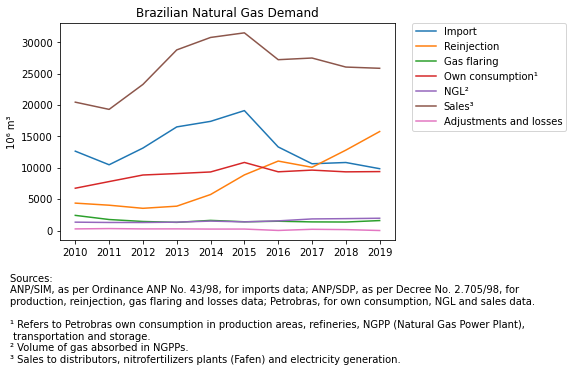

In [21]:
demand.df.plot()
plt.xticks(np.arange(2010,2020,1))
plt.ylabel(demand.unit)
plt.title(demand.title)
plt.figtext(0.01,-0.3, balance.footer)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/demand.png',dpi=600,bbox_inches='tight')

## Balance

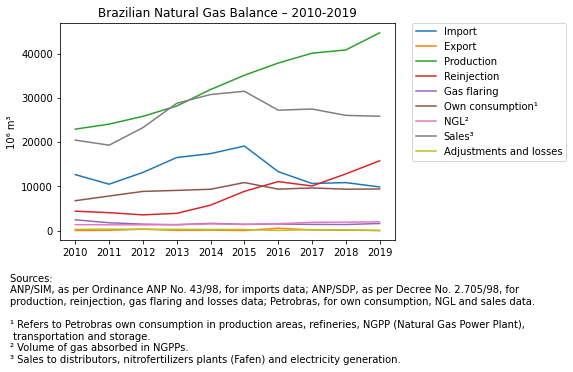

In [22]:

balance.df.plot()
plt.figtext(0.01,-0.3, balance.footer)
plt.ylabel(balance.unit)
plt.xticks(np.arange(2010,2020,1))
plt.title(balance.title)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/balance.png',dpi=600,bbox_inches='tight')



## Balance Correlation

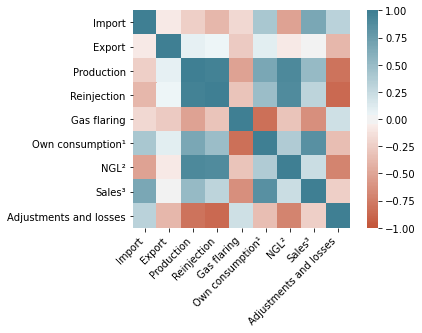

In [6]:
corr = balance.df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Electric Energy by Source

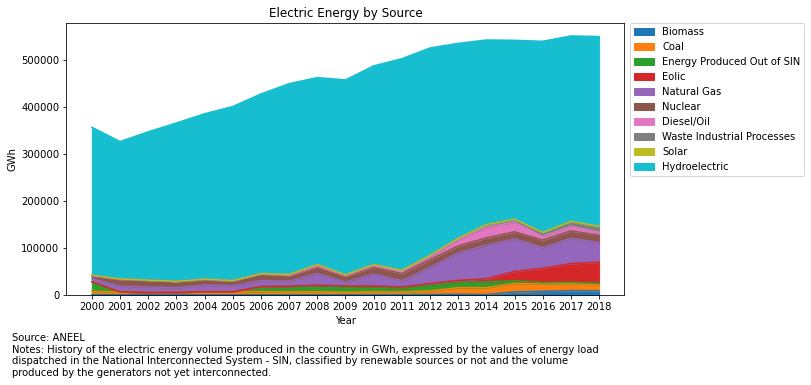

In [206]:
energy_source.df.sum(axis=0, level=0).plot(kind='area', figsize=(10,5))
plt.figtext(0.05,-0.1, energy_source.footer)
plt.ylabel(energy_source.unit)
plt.xticks(np.arange(2000,2019,1))
plt.title(energy_source.title)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/energy_source.png',dpi=600,bbox_inches='tight')

## Average Reference Price for Natural Gas

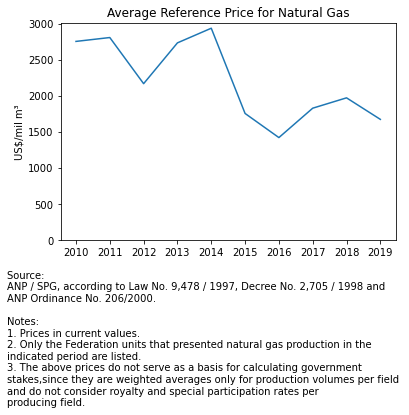

In [9]:
avg_price.df.sum(axis=1).plot()
plt.figtext(0.001,-0.45, avg_price.footer)
plt.ylabel(avg_price.unit)
plt.yticks(np.arange(0,3500,500))
plt.xticks(np.arange(2010,2020,1))
plt.title('Average Reference Price for Natural Gas')
plt.savefig('plots/avg_price.png',dpi=600,bbox_inches='tight')

## Sales by Segment

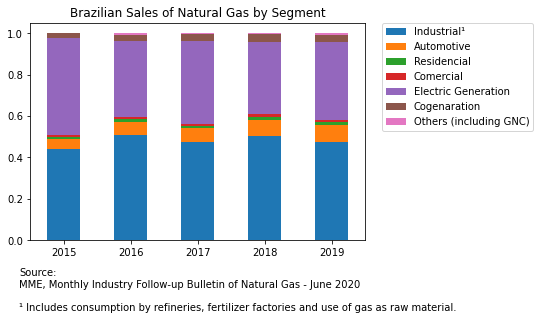

In [199]:
sales_per.df.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.title(sales_per.title)
plt.xticks(rotation=0)
plt.figtext(0.1,-0.12, sales_per.footer);
plt.savefig('plots/sales_per.png',dpi=600,bbox_inches='tight')

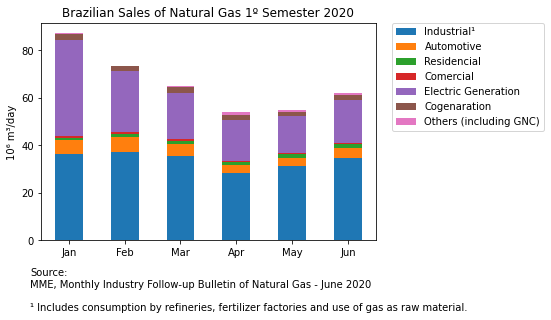

In [200]:
sales_seg_covid.df.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.title(sales_seg_covid.title)
plt.xticks(rotation=0)
plt.ylabel(sales_seg_covid.unit)
plt.figtext(0.1,-0.12, sales_seg_covid.footer);
plt.savefig('plots/sales_seg_covid.png',dpi=600,bbox_inches='tight')

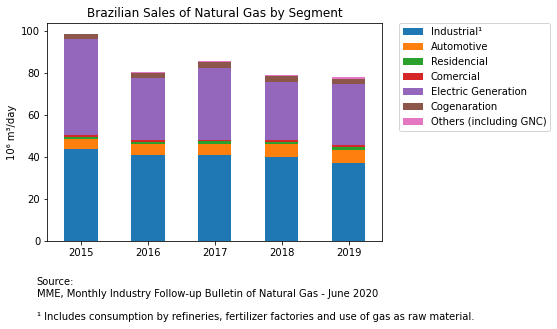

In [201]:
sales_segment.df.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.title(sales_segment.title)
plt.xticks(rotation=0)
plt.ylabel(sales_segment.unit)
plt.figtext(0.1,-0.15, sales_segment.footer);
plt.savefig('plots/sales_seg.png',dpi=600,bbox_inches='tight')

## Beautiful Graph Inspiration

In [112]:
category_names = demand_segment.df.columns.to_list()


results = {demand_segment.df.index[0] : demand_segment.df.iloc[0,:].values.tolist(),
demand_segment.df.index[1] : demand_segment.df.iloc[1,:].values.tolist(),
demand_segment.df.index[2] : demand_segment.df.iloc[2,:].values.tolist(),
demand_segment.df.index[3] : demand_segment.df.iloc[3,:].values.tolist()}


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


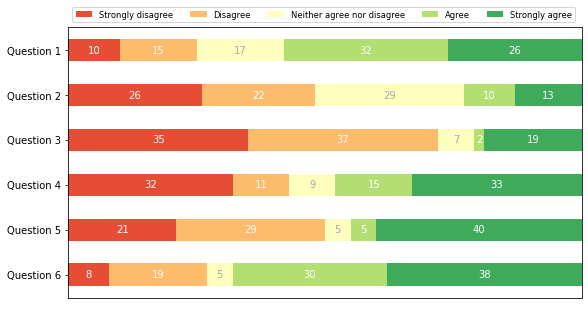

In [113]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()